In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("C:/Users/namuu/Downloads/unegui_allduureg.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19392 entries, 0 to 19391
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   floor                  19392 non-null  object 
 1   balcony                19392 non-null  object 
 2   garage                 19392 non-null  object 
 3   window                 19392 non-null  object 
 4   door                   19392 non-null  object 
 5   numberofwindows        19392 non-null  int64  
 6   construction_progress  19392 non-null  object 
 7   built_year             19392 non-null  int64  
 8   total_floor            19392 non-null  int64  
 9    m2                    19392 non-null  float64
 10  located_floor          19392 non-null  int64  
 11  elevator               19392 non-null  object 
 12  payment_term           19392 non-null  object 
 13  location               19392 non-null  object 
 14  posted_date            19392 non-null  object 
 15   p

In [ ]:
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19392 entries, 0 to 19391
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   floor                  19392 non-null  object 
 1   balcony                19392 non-null  object 
 2   garage                 19392 non-null  object 
 3   window                 19392 non-null  object 
 4   door                   19392 non-null  object 
 5   numberofwindows        19392 non-null  int64  
 6   construction_progress  19392 non-null  object 
 7   built_year             19392 non-null  int64  
 8   total_floor            19392 non-null  int64  
 9   m2                     19392 non-null  float64
 10  located_floor          19392 non-null  int64  
 11  elevator               19392 non-null  object 
 12  payment_term           19392 non-null  object 
 13  location               19392 non-null  object 
 14  posted_date            19392 non-null  object 
 15  pr

In [ ]:
# data cleaning

df['price'] = df['price'].str.replace(",", "").str.strip()
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19392 entries, 0 to 19391
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   floor                  19392 non-null  object 
 1   balcony                19392 non-null  object 
 2   garage                 19392 non-null  object 
 3   window                 19392 non-null  object 
 4   door                   19392 non-null  object 
 5   numberofwindows        19392 non-null  int64  
 6   construction_progress  19392 non-null  object 
 7   built_year             19392 non-null  int64  
 8   total_floor            19392 non-null  int64  
 9   m2                     19392 non-null  float64
 10  located_floor          19392 non-null  int64  
 11  elevator               19392 non-null  object 
 12  payment_term           19392 non-null  object 
 13  location               19392 non-null  object 
 14  posted_date            19392 non-null  object 
 15  pr

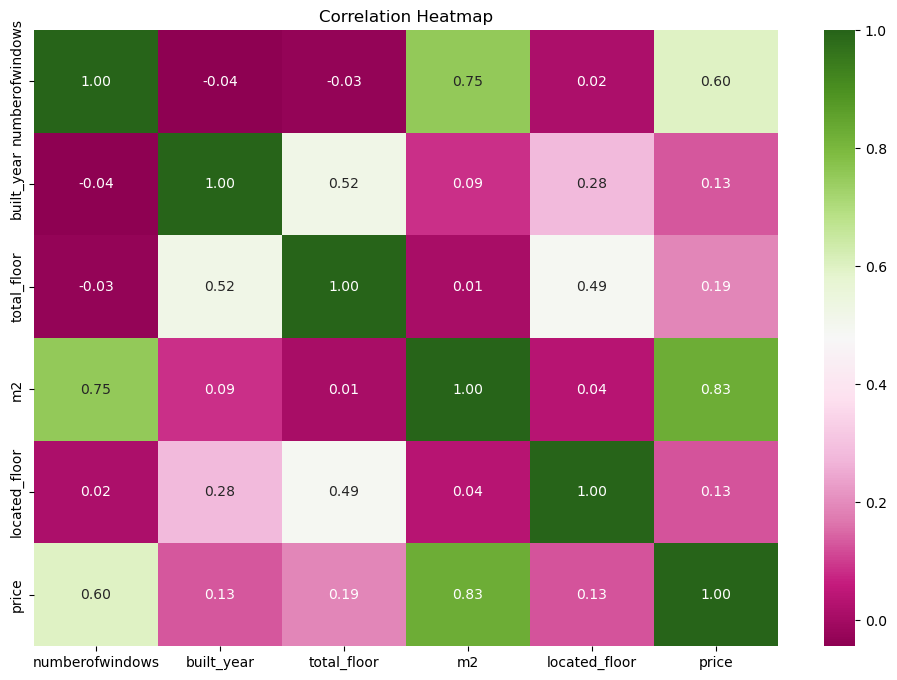

In [ ]:
# correlation heatmap for numerical variables

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="PiYG")
plt.title("Correlation Heatmap")
plt.show()

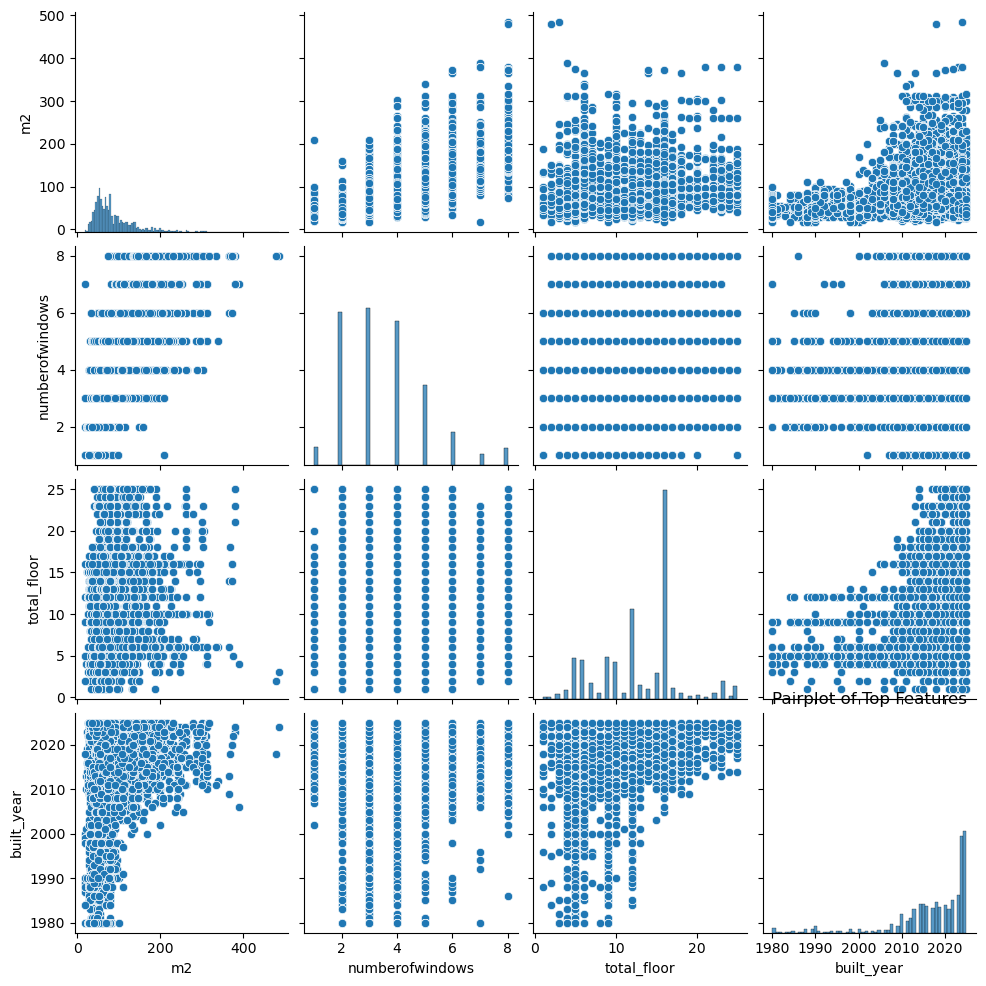

In [ ]:
# pairplot for all combinations of top features

top_features = ['m2', 'numberofrooms', 'numberofwindows', 'total_floor', 'built_year']
sns.pairplot(df[top_features])
plt.title("Pairplot of Top Features")
plt.show()

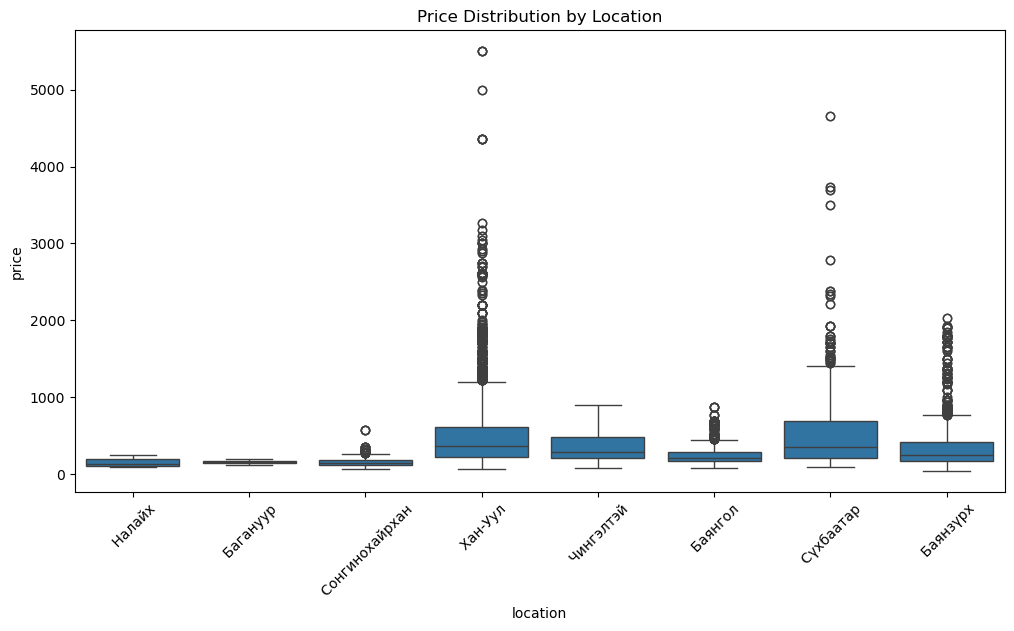

In [ ]:
# boxplot to compare price across different locations

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="location", y="price")
plt.xticks(rotation=45)
plt.title("Price Distribution by Location")
plt.show()

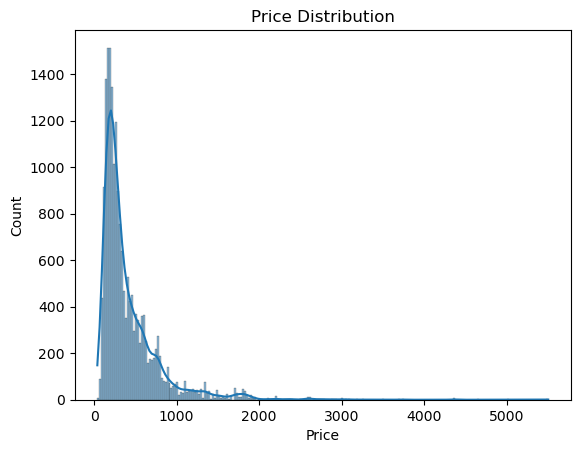

In [ ]:
# histogram with kernel density to show price distribution

sns.histplot(df['price'], kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

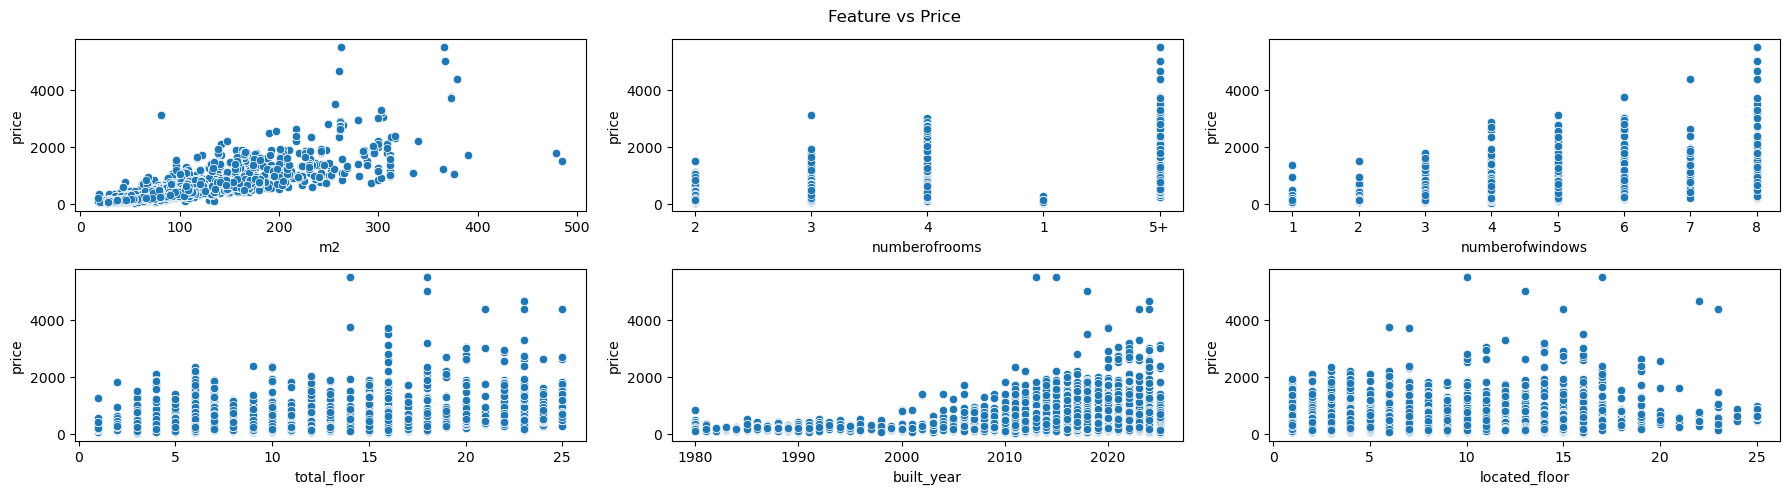

In [ ]:
# subplots for analyzing relationship between features and price

fig, axes = plt.subplots(2, 3, figsize=(18, 5))
axes = axes.ravel()
sns.scatterplot(data=df, x='m2', y='price', ax=axes[0])
sns.scatterplot(data=df, x='numberofrooms', y='price', ax=axes[1])
sns.scatterplot(data=df, x='numberofwindows', y='price', ax=axes[2])
sns.scatterplot(data=df, x='total_floor', y='price', ax=axes[3])
sns.scatterplot(data=df, x='built_year', y='price', ax=axes[4])
sns.scatterplot(data=df, x='located_floor', y='price', ax=axes[5])
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle("Feature vs Price")
plt.show()

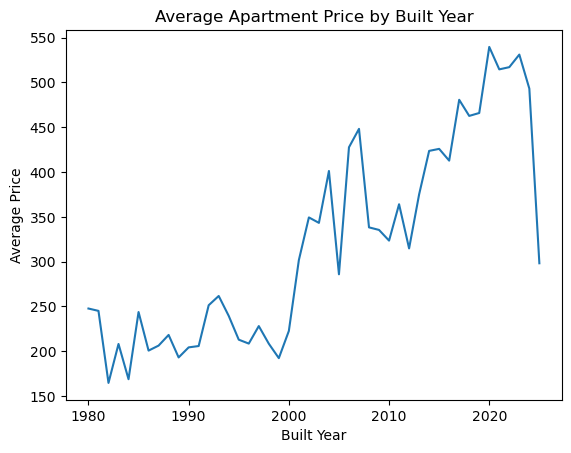

In [ ]:
# plot for price trend over built years

df_grouped = df.groupby('built_year')['price'].mean().reset_index()
sns.lineplot(data=df_grouped, x='built_year', y='price')
plt.title("Average Apartment Price by Built Year")
plt.ylabel("Average Price")
plt.xlabel("Built Year")
plt.show()

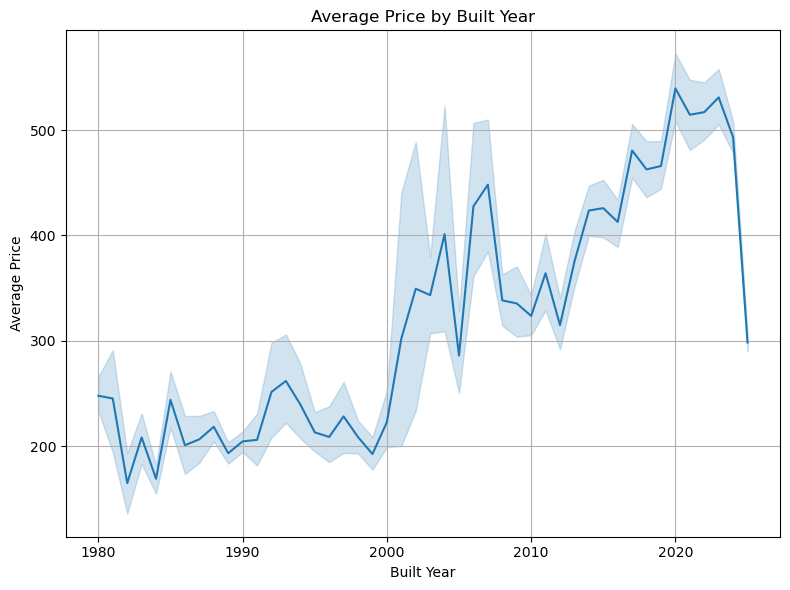

In [ ]:
# line plot for average price trend by built year

plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='built_year', y='price')
plt.title("Average Price by Built Year")
plt.xlabel("Built Year")
plt.ylabel("Average Price")
plt.grid(True)
plt.tight_layout()
plt.show()

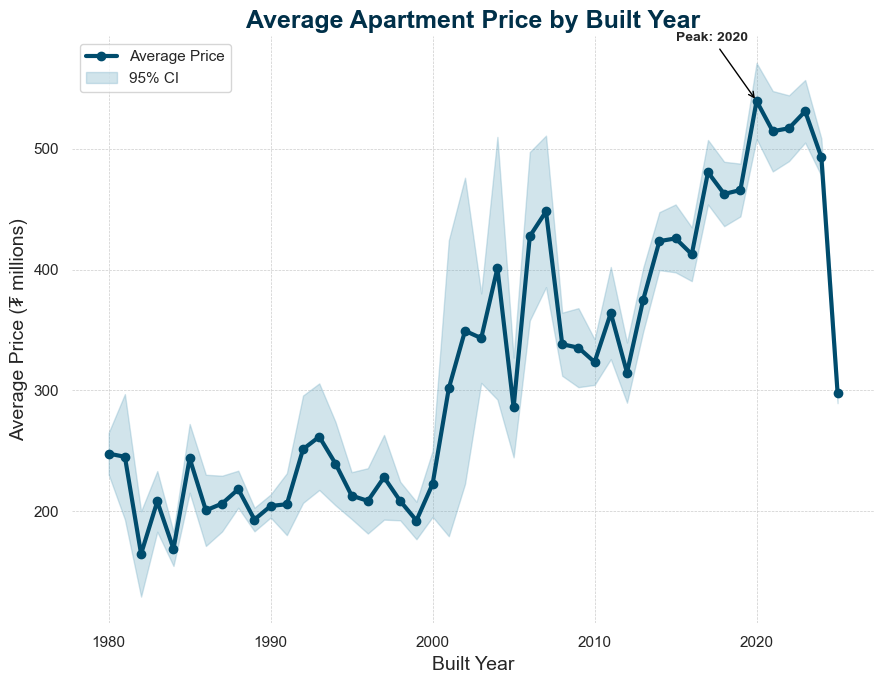

In [ ]:
# line plot for average price trend by built year with confidence interval and peak

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

avg_price_by_year = df.groupby('built_year')['price'].agg(['mean', 'count', 'std']).reset_index()
avg_price_by_year['ci'] = 1.96 * avg_price_by_year['std'] / avg_price_by_year['count']**0.5

plt.figure(figsize=(9, 7))
sns.set_theme(style="whitegrid")

plt.plot(
    avg_price_by_year['built_year'],
    avg_price_by_year['mean'],
    color="#004c6d",
    linewidth=3,
    marker='o',
    markersize=6,
    label="Average Price"
)

plt.fill_between(
    avg_price_by_year['built_year'],
    avg_price_by_year['mean'] - avg_price_by_year['ci'],
    avg_price_by_year['mean'] + avg_price_by_year['ci'],
    color="#69a7c0",
    alpha=0.3,
    label="95% CI"
)

peak_year = avg_price_by_year.loc[avg_price_by_year['mean'].idxmax()]
plt.annotate(f"Peak: {int(peak_year['built_year'])}",
             xy=(peak_year['built_year'], peak_year['mean']),
             xytext=(peak_year['built_year']-5, peak_year['mean']+50),
             arrowprops=dict(arrowstyle="->", color='black'),
             fontsize=10, fontweight='bold')

plt.title("Average Apartment Price by Built Year", fontsize=18, fontweight='bold', color='#003049')
plt.xlabel("Built Year", fontsize=14)
plt.ylabel("Average Price (₮ millions)", fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=11, loc="upper left")
plt.tight_layout()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.box(False)
plt.show()

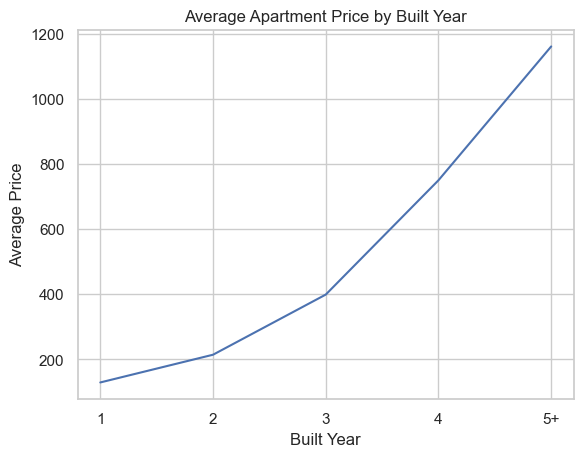

In [ ]:
# line plot to show how price increases with number of rooms

df_grouped1 = df.groupby('numberofrooms')['price'].mean().reset_index()
sns.lineplot(data=df_grouped1, x='numberofrooms', y='price')
plt.title("Average Apartment Price by Built Year")
plt.ylabel("Average Price")
plt.xlabel("Built Year")
plt.show()

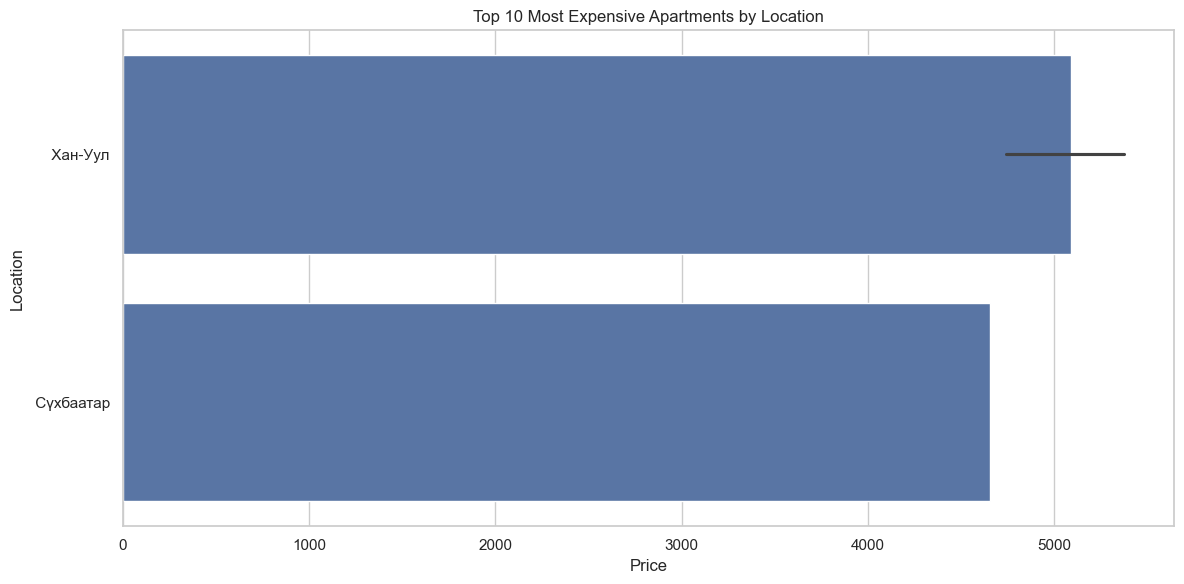

In [ ]:
# horizontal bar for showing the most expensive ads

top_n = df.sort_values(by='price', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_n, x='price', y='location')
plt.title("Top 10 Most Expensive Apartments by Location")
plt.xlabel("Price")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

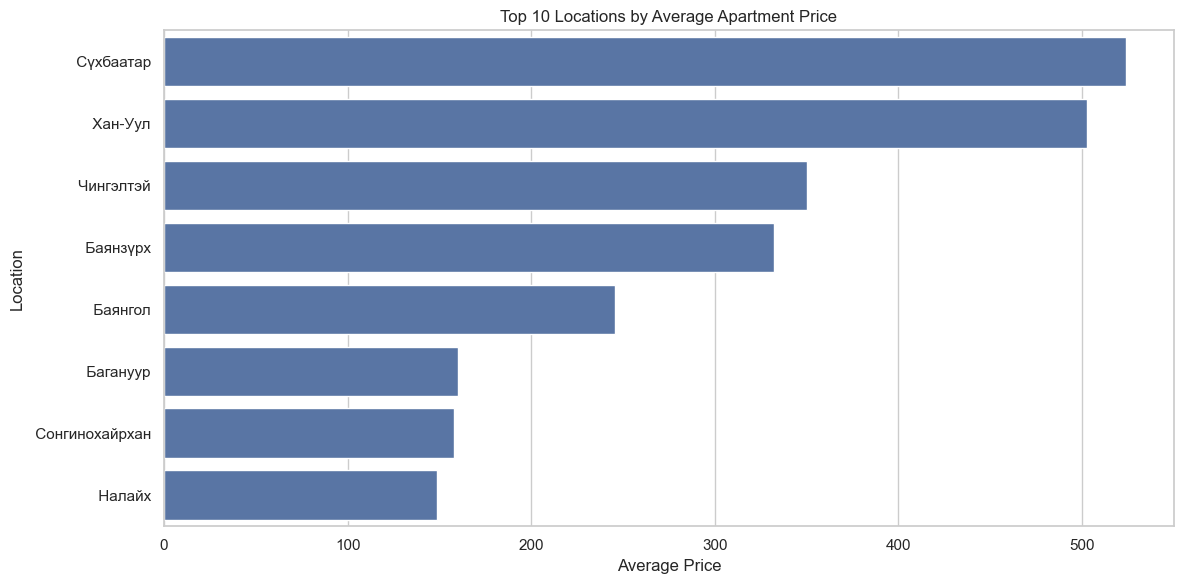

In [ ]:
# horizontal bar chart to show locations with highest average prices

top_avg_price = df.groupby('location')['price'].mean().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_avg_price, x='price', y='location')
plt.title("Top 10 Locations by Average Apartment Price")
plt.xlabel("Average Price")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

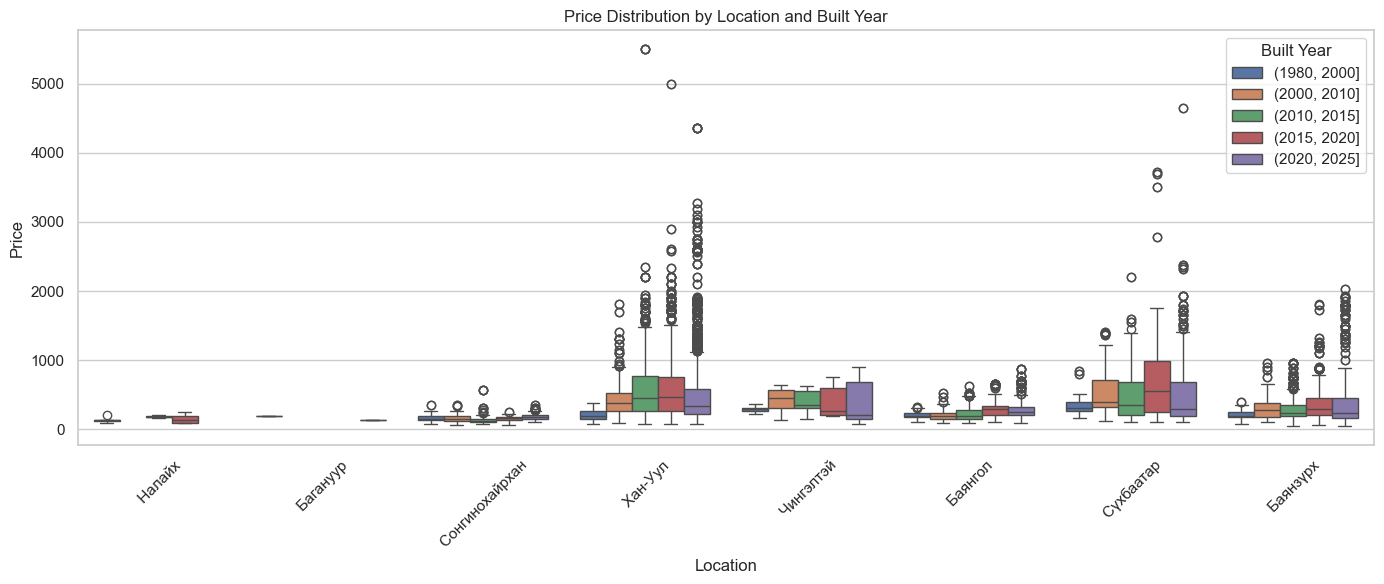

In [ ]:
# boxplot to compare price distribution by location and built year

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='location', y='price', hue=pd.cut(df['built_year'], bins=[1980, 2000, 2010, 2015, 2020, 2025]))
plt.title("Price Distribution by Location and Built Year")
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("Price")
plt.legend(title="Built Year")
plt.tight_layout()
plt.show()

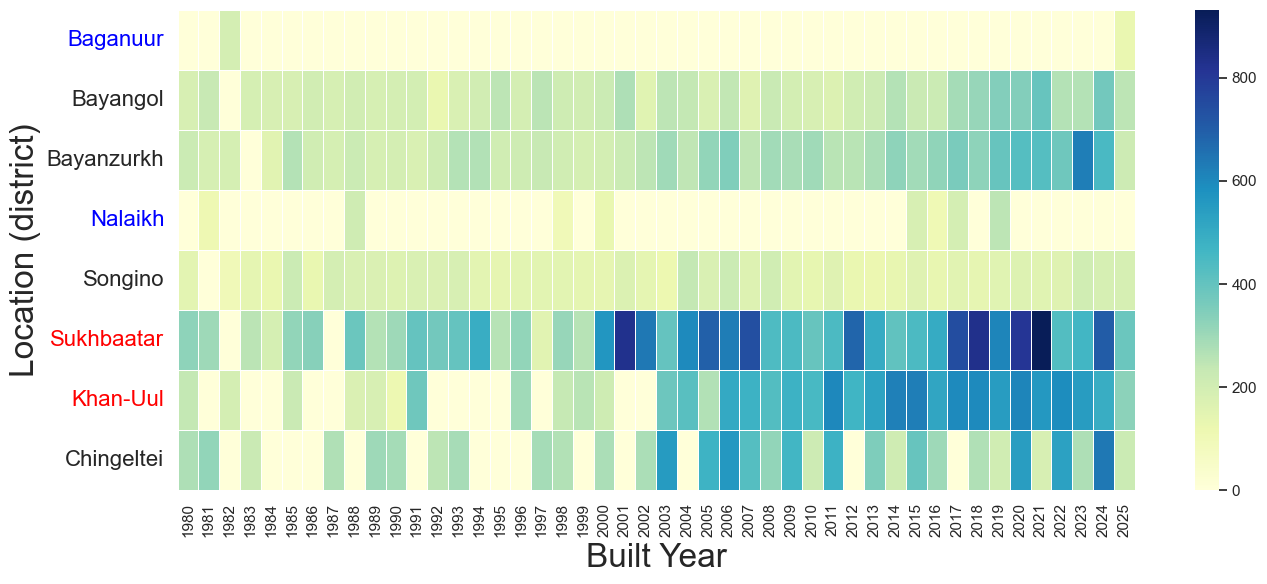

In [ ]:
# pivot table with location as rows and built year as columns

pivot = df.groupby(['location', 'built_year'])['price'].mean().unstack().fillna(0)
plt.figure(figsize=(14, 6))
ax = sns.heatmap(pivot, cmap="YlGnBu", linewidths=0.5)

labels = ['Baganuur', 'Bayangol', 'Bayanzurkh', 'Nalaikh', 'Songino',
    'Sukhbaatar', 'Khan-Uul', 'Chingeltei']

tick_texts = ax.set_yticklabels(labels, fontsize=16)
highlight_labels = ['Sukhbaatar', 'Khan-Uul']
for label in tick_texts:
    if label.get_text() in highlight_labels:
        label.set_color('red')

highlight_labels2 = ['Baganuur', 'Nalaikh']
for label in tick_texts:
    if label.get_text() in highlight_labels2:
        label.set_color('blue')

plt.xlabel("Built Year", fontsize=24)
plt.ylabel("Location (district)", fontsize=24)
plt.tight_layout()
plt.savefig('builtyear.png')
plt.show()

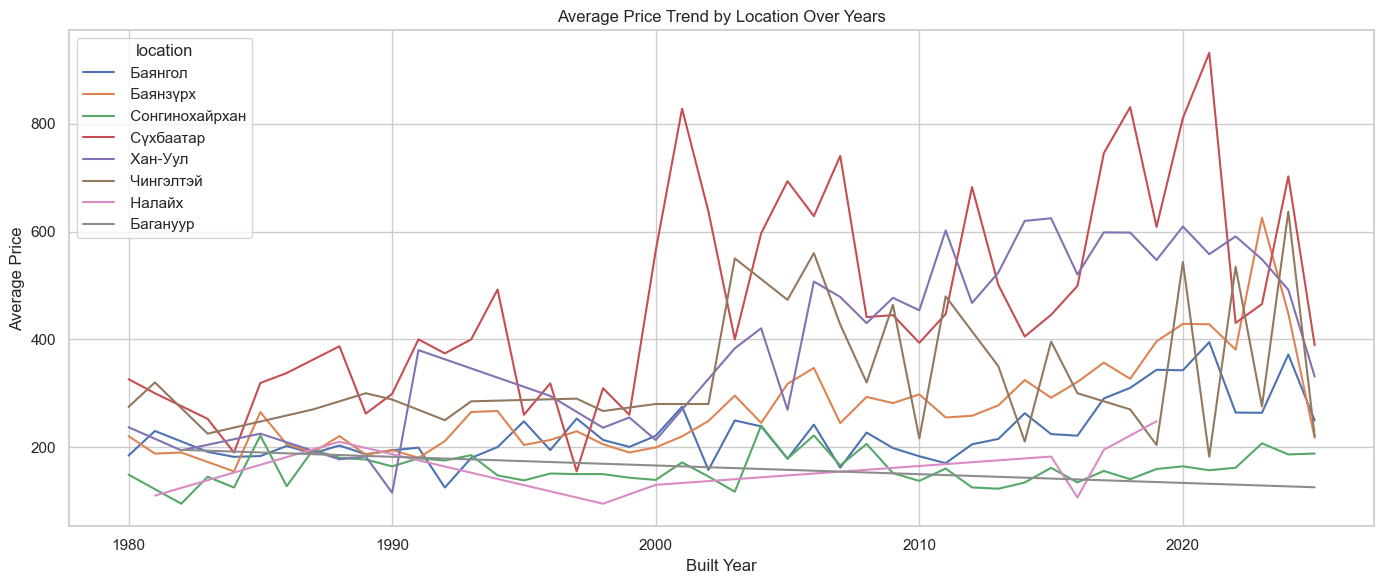

In [ ]:
# multi-line plot to show how prices changed in each location over time

trend = df.groupby(['built_year', 'location'])['price'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=trend, x='built_year', y='price', hue='location')
plt.title("Average Price Trend by Location Over Years")
plt.xlabel("Built Year")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()

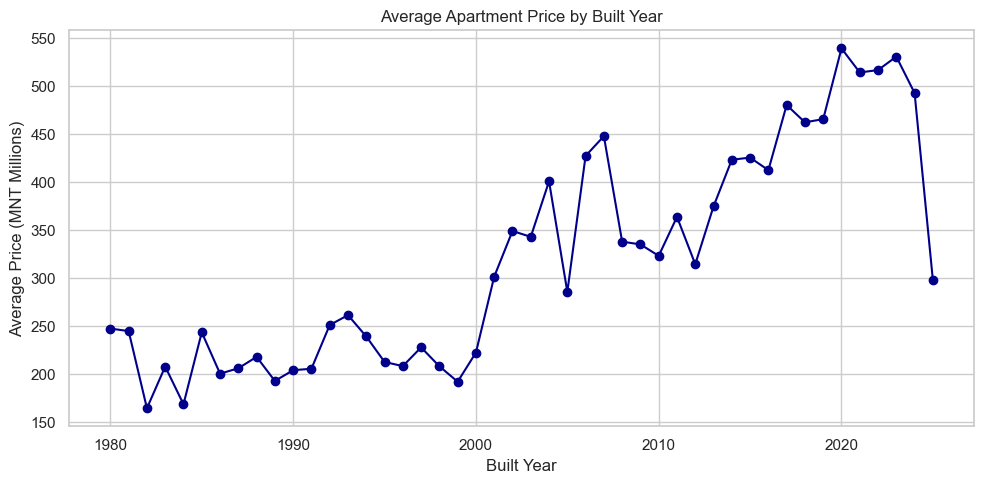

In [ ]:
# line plot for price trend over years

avg_price_by_year = df.groupby('built_year')['price'].mean()
plt.figure(figsize=(10, 5))
plt.plot(avg_price_by_year.index, avg_price_by_year.values, marker='o', color='darkblue')
plt.title('Average Apartment Price by Built Year')
plt.xlabel('Built Year')
plt.ylabel('Average Price (MNT Millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# price per square meter new feature

df['price_per_m2'] = df['price'] / df['m2']

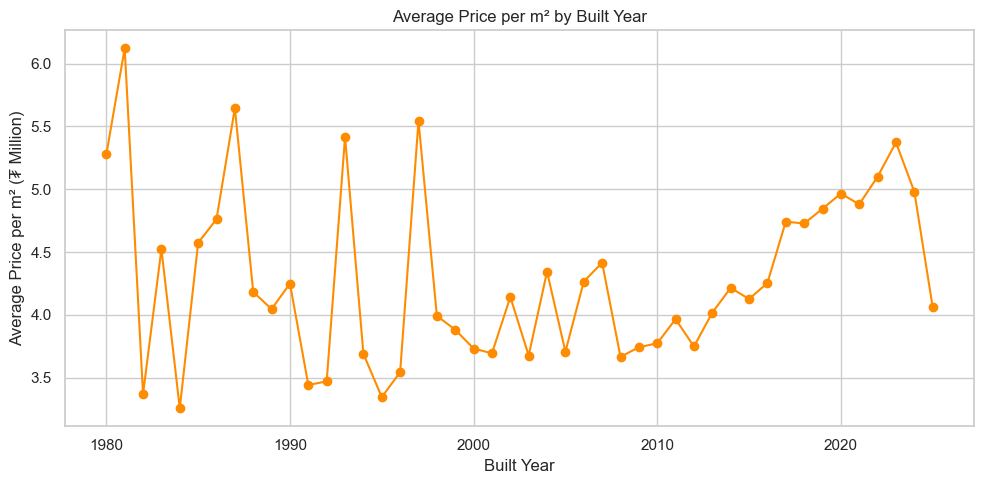

In [ ]:
# line plot for price per meter square trend

avg_price_per_m2 = df.groupby('built_year')['price_per_m2'].mean()
plt.figure(figsize=(10, 5))
plt.plot(avg_price_per_m2.index, avg_price_per_m2.values, marker='o', color='darkorange')
plt.title('Average Price per m² by Built Year')
plt.xlabel('Built Year')
plt.ylabel('Average Price per m² (₮ Million)')
plt.grid(True)
plt.tight_layout()
plt.show()

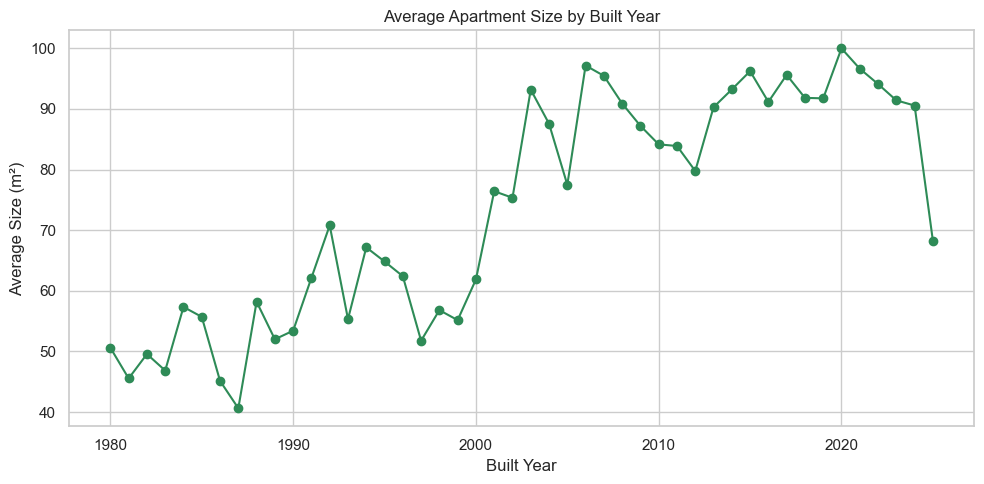

In [ ]:
# line plot to show how apartment sizes changed over time

avg_size_by_year = df.groupby('built_year')['m2'].mean()

plt.figure(figsize=(10, 5))
plt.plot(avg_size_by_year.index, avg_size_by_year.values, marker='o', color='seagreen')
plt.title('Average Apartment Size by Built Year')
plt.xlabel('Built Year')
plt.ylabel('Average Size (m²)')
plt.grid(True)
plt.tight_layout()
plt.show()

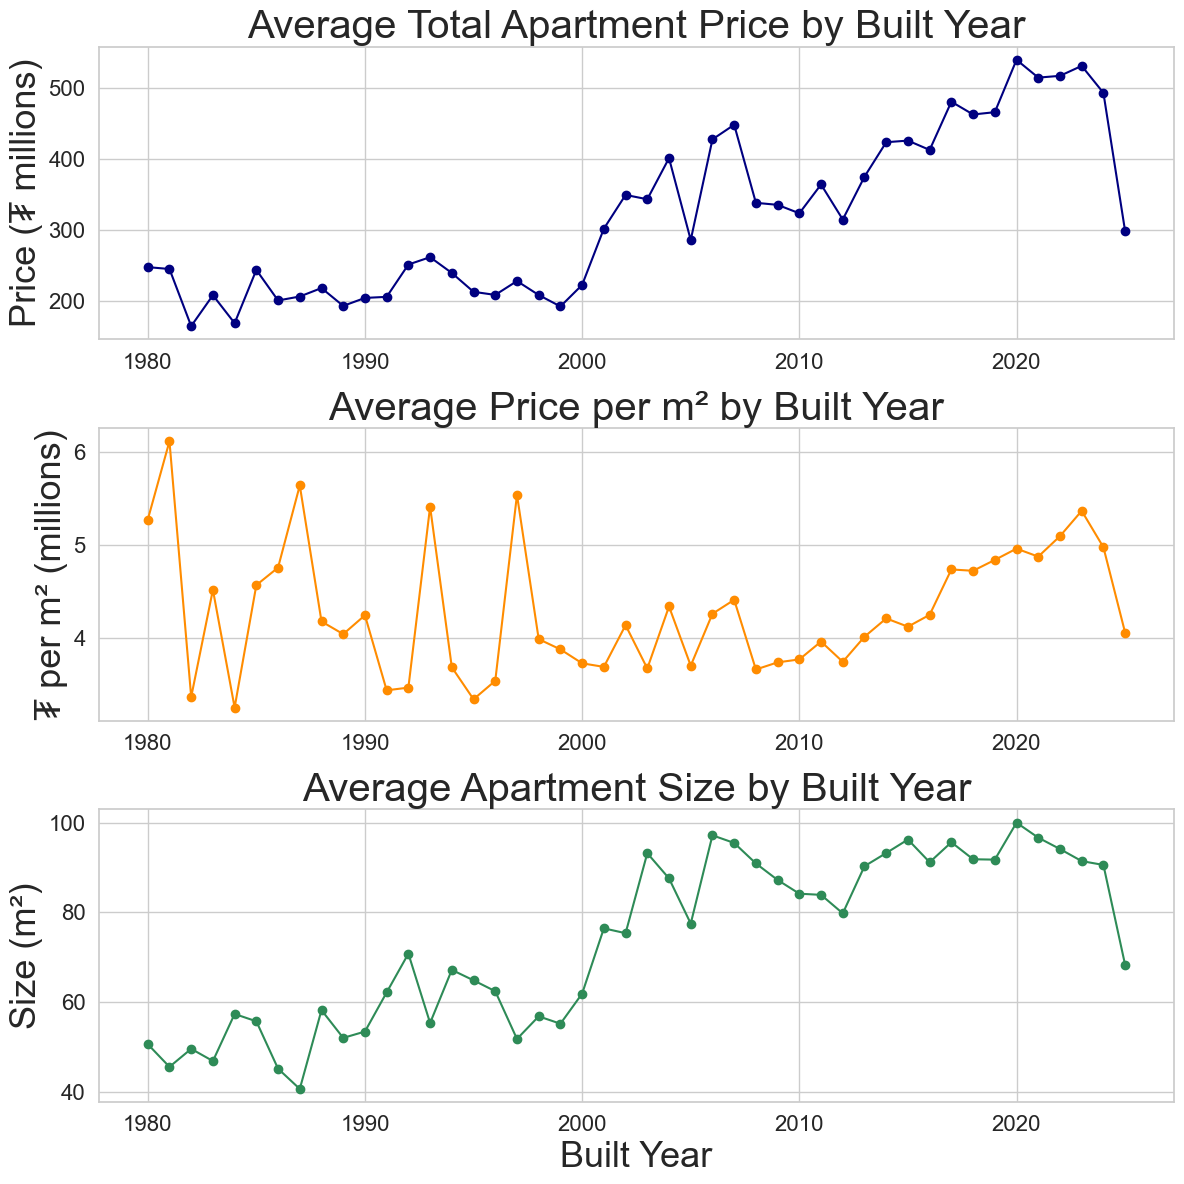

In [ ]:
# subplots to compare all metrics

avg_total_price = df.groupby('built_year')['price'].mean()
avg_price_per_m2 = df.groupby('built_year')['price_per_m2'].mean()
avg_size_m2 = df.groupby('built_year')['m2'].mean()

fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# total apartment price trend
axs[0].plot(avg_total_price.index, avg_total_price.values, marker='o', color='navy')
axs[0].set_title('Average Total Apartment Price by Built Year', fontsize=29)
axs[0].set_ylabel('Price (₮ millions)', fontsize=26)
axs[0].grid(True)
axs[0].tick_params(labelbottom=True, labelsize=16)

# price per square meter trend
axs[1].plot(avg_price_per_m2.index, avg_price_per_m2.values, marker='o', color='darkorange')
axs[1].set_title('Average Price per m² by Built Year', fontsize=29)
axs[1].set_ylabel('₮ per m² (millions)', fontsize=26)
axs[1].grid(True)
axs[1].tick_params(labelbottom=True, labelsize=16)

# apartment size trend
axs[2].plot(avg_size_m2.index, avg_size_m2.values, marker='o', color='seagreen')
axs[2].set_title('Average Apartment Size by Built Year', fontsize=29)
axs[2].set_xlabel('Built Year', fontsize=26)
axs[2].set_ylabel('Size (m²)', fontsize=26)
axs[2].tick_params(labelsize=16)
axs[2].grid(True)

plt.tight_layout()
plt.savefig("plot.png", dpi=300, bbox_inches='tight')
plt.show()

C:\Users\namuu\AppData\Local\Temp\ipykernel_5540\932821775.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_per_m2_size = df.groupby('size_group')['price_per_m2'].mean()


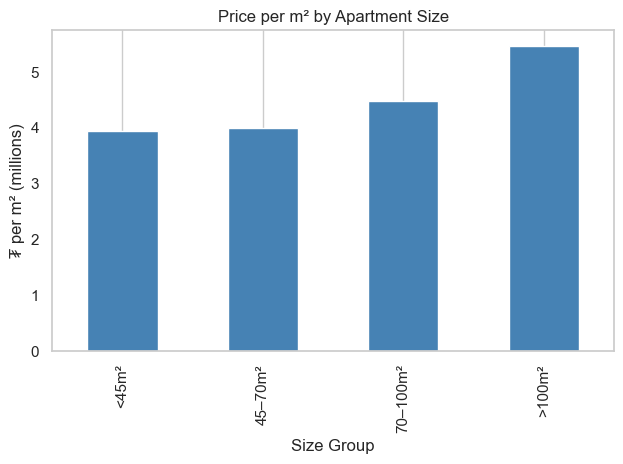

In [ ]:
# bar chart to show how price per meter square are different by apartment size

df['size_group'] = pd.cut(df['m2'], bins=[0, 45, 70, 100, float('inf')],
                          labels=['<45m²', '45–70m²', '70–100m²', '>100m²'])

avg_price_per_m2_size = df.groupby('size_group')['price_per_m2'].mean()

avg_price_per_m2_size.plot(kind='bar', color='steelblue')
plt.title('Price per m² by Apartment Size')
plt.ylabel('₮ per m² (millions)')
plt.xlabel('Size Group')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

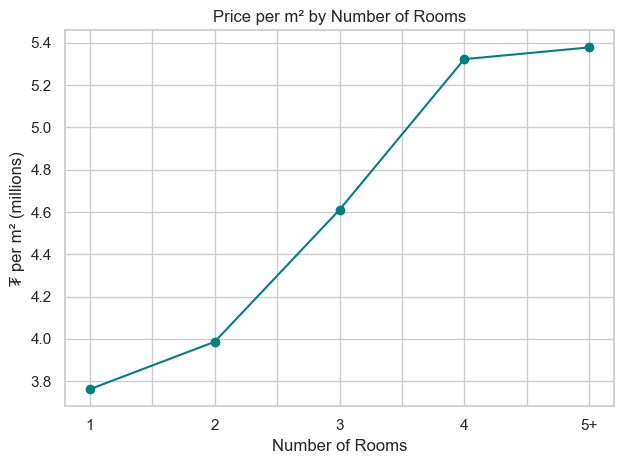

In [ ]:
# line plot to show relationship between room count and price per meter square

avg_price_per_m2_rooms = df.groupby('numberofrooms')['price_per_m2'].mean()

avg_price_per_m2_rooms.plot(marker='o', color='teal')
plt.title('Price per m² by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('₮ per m² (millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

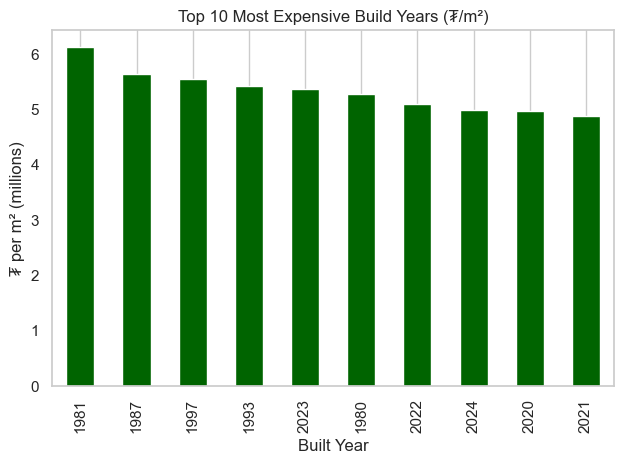

In [ ]:
# bar chart to show which build years have highest price per square meter

top_build_years = df.groupby('built_year')['price_per_m2'].mean().sort_values(ascending=False).head(10)

top_build_years.plot(kind='bar', color='darkgreen')
plt.title('Top 10 Most Expensive Build Years (₮/m²)')
plt.ylabel('₮ per m² (millions)')
plt.xlabel('Built Year')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

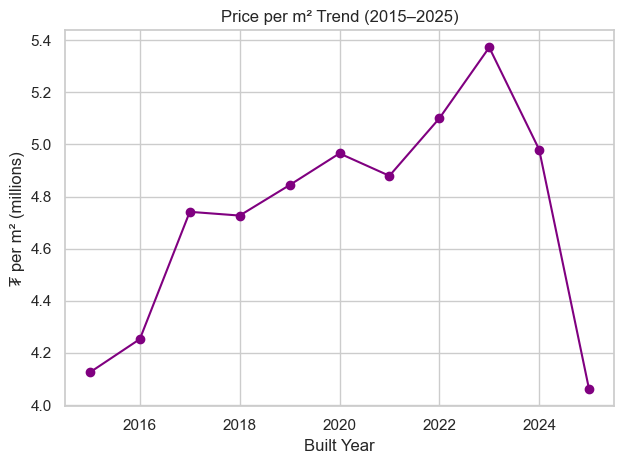

In [ ]:
# line plot focusing on recent price per meter square trend

recent_price_per_m2 = df[df['built_year'] >= 2015].groupby('built_year')['price_per_m2'].mean()

recent_price_per_m2.plot(marker='o', color='purple')
plt.title('Price per m² Trend (2015–2025)')
plt.xlabel('Built Year')
plt.ylabel('₮ per m² (millions)')
plt.grid(True)
plt.tight_layout()
plt.show()